# RandomForest Classifier:

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.model_selection import train_test_split, GridSearchCV

In [6]:
df = pd.read_csv('heart_v2.csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [8]:
df.shape

(270, 5)

In [10]:
df.isnull().sum().any()

False

In [12]:
df.isnull().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [16]:
# Creating helper functions to plot trees:
def plot_dt(model, class_names):
    
    # Dynamically adjust the figure size based on the depth of the tree
    depth = model.get_depth()  # Get the depth of the tree
    num_leaves = model.get_n_leaves()  # Get the number of leaves

    # Set width proportional to the number of leaves and height to the depth
    plt.figure(figsize=[num_leaves * 2, depth * 2])
    
    plot_tree(decision_tree=model, 
              feature_names=model.feature_names_in_, 
              filled=True,
              class_names=class_names)
    plt.title('Decision Tree Classification')
    plt.show()

# Creating helper function for the evaluation of trees:
def evaluation(data_type, ytrue, ypred):
    cm = confusion_matrix(ytrue, ypred)
    print(f"\nConfusion Matrix for {data_type} set:")
    ConfusionMatrixDisplay(cm).plot()
    plt.show()
    
    TN, TP, FN, FP = cm[0,0], cm[1,1], cm[1,0], cm[0,1]
    print('\n')
    print(classification_report(ytrue, ypred))
    print('\n')
    print(f"The Accuracy on {data_type} dataset is : {round(accuracy_score(ytrue, ypred), 3)}")
    print(f"The Sensitivity on {data_type} is : {round(recall_score(ytrue, ypred), 3)}")
    print(f"The Specificity on {data_type} is : {round((TN/(TN+FP)), 3)}")
    print('='*150)

## Train test split:

In [19]:
y = df.pop('heart disease')
X = df

In [27]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=42)

In [29]:
rfc_vanilla = RandomForestClassifier()
rfc_vanilla.fit(Xtrain, ytrain)

RandomForestClassifier()

In [31]:
y_train_pred_vanilla = rfc_vanilla.predict(Xtrain)
y_test_pred_vanilla = rfc_vanilla.predict(Xtest)


Confusion Matrix for Train set:


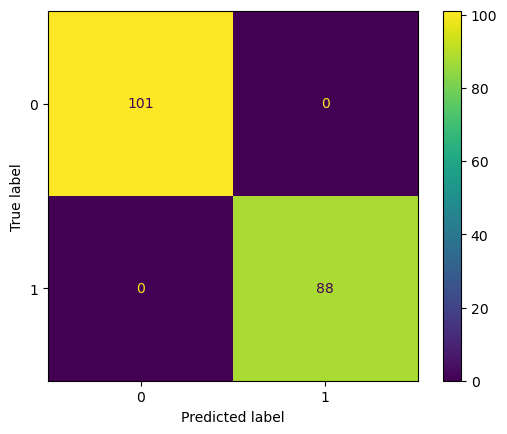



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        88

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189



The Accuracy on Train dataset is : 1.0
The Sensitivity on Train is : 1.0
The Specificity on Train is : 1.0

Confusion Matrix for Test set:


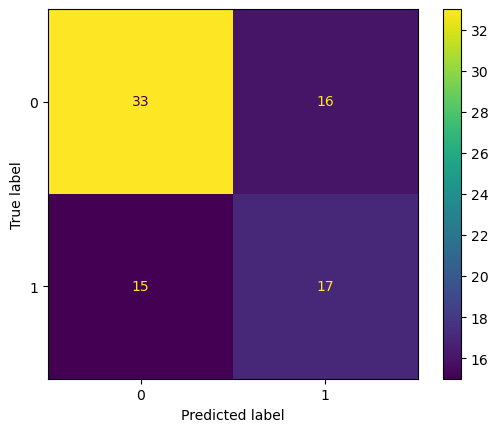



              precision    recall  f1-score   support

           0       0.69      0.67      0.68        49
           1       0.52      0.53      0.52        32

    accuracy                           0.62        81
   macro avg       0.60      0.60      0.60        81
weighted avg       0.62      0.62      0.62        81



The Accuracy on Test dataset is : 0.617
The Sensitivity on Test is : 0.531
The Specificity on Test is : 0.673


In [33]:
evaluation('Train', ytrian, y_train_pred_vanilla)
evaluation('Test', ytest, y_test_pred_vanilla)

We can see that the model is clearly overfitting.

### Let's do some hyperparameter tuning:

In [37]:
rfc = RandomForestClassifier()

params_space = {'n_estimators' : [10, 25, 50, 100, 200, 300, 400, 500],
                'criterion' : ['gini', 'entropy', 'log_loss'],
                'max_features' : ['sqrt', 'log2'],
                'max_depth' : [3,4,5,6,],
                'min_samples_split' : [2,5,7,10,13,15,18,20],
                'min_samples_leaf' : [2,4,7,10,12,15,17,20]}

grid_search_model = GridSearchCV(estimator=rfc, 
                                 param_grid=params_space,
                                 scoring='accuracy',      # accuracy because in our case, the classes are failry balanced.
                                 cv=5, 
                                 n_jobs=-1, 
                                 return_train_score=True, 
                                 verbose=1)

In [39]:
%%time
grid_search_model.fit(Xtrain, ytrain)

Fitting 5 folds for each of 12288 candidates, totalling 61440 fits
CPU times: total: 1min 28s
Wall time: 21min 34s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 4, 7, 10, 12, 15, 17, 20],
                         'min_samples_split': [2, 5, 7, 10, 13, 15, 18, 20],
                         'n_estimators': [10, 25, 50, 100, 200, 300, 400, 500]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [40]:
grid_search_model.best_params_ 

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 7,
 'n_estimators': 10}

In [41]:
grid_search_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=4,
                       min_samples_split=7, n_estimators=10)

In [42]:
final_rfc = grid_search_model.best_estimator_

In [43]:
ytrain_pred = final_rfc.predict(Xtrain)
ytest_pred = final_rfc.predict(Xtest)

In [44]:
# ytrain 

# by mistake typed as ytrian instead of ytrain


Confusion Matrix for Train set:


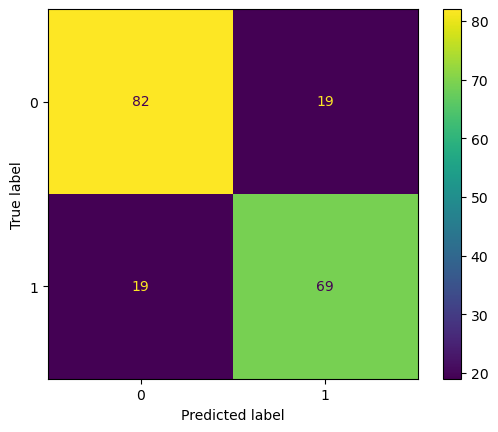



              precision    recall  f1-score   support

           0       0.81      0.81      0.81       101
           1       0.78      0.78      0.78        88

    accuracy                           0.80       189
   macro avg       0.80      0.80      0.80       189
weighted avg       0.80      0.80      0.80       189



The Accuracy on Train dataset is : 0.799
The Sensitivity on Train is : 0.784
The Specificity on Train is : 0.812

Confusion Matrix for Test set:


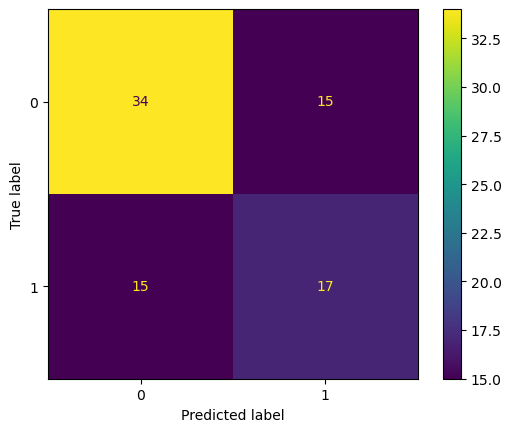



              precision    recall  f1-score   support

           0       0.69      0.69      0.69        49
           1       0.53      0.53      0.53        32

    accuracy                           0.63        81
   macro avg       0.61      0.61      0.61        81
weighted avg       0.63      0.63      0.63        81



The Accuracy on Test dataset is : 0.63
The Sensitivity on Test is : 0.531
The Specificity on Test is : 0.694


In [42]:
evaluation('Train', ytrian, ytrain_pred)
evaluation('Test', ytest, ytest_pred)

In [64]:
# Visualizing some random trees in our Random Forest:

rf_best = grid_search_model.best_estimator_

In [66]:
type(rf_best)

sklearn.ensemble._forest.RandomForestClassifier

In [68]:
type(grid_search_model.best_estimator_)

sklearn.ensemble._forest.RandomForestClassifier

In [80]:
rf_best.estimators_

[DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='log2',
                        min_samples_leaf=2, random_state=164447699),
 DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='log2',
                        min_samples_leaf=2, random_state=656256261),
 DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='log2',
                        min_samples_leaf=2, random_state=1979399303),
 DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='log2',
                        min_samples_leaf=2, random_state=115544416),
 DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='log2',
                        min_samples_leaf=2, random_state=1548389768),
 DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='log2',
                        min_samples_leaf=2, random_state=1570415941),
 DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='log2',
                       

In [82]:
sample_tree = rf_best.estimators_[2]
sample_tree

DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='log2',
                       min_samples_leaf=2, random_state=1979399303)

In [90]:
sample_tree.fe

DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='log2',
                       min_samples_leaf=2, random_state=1979399303)

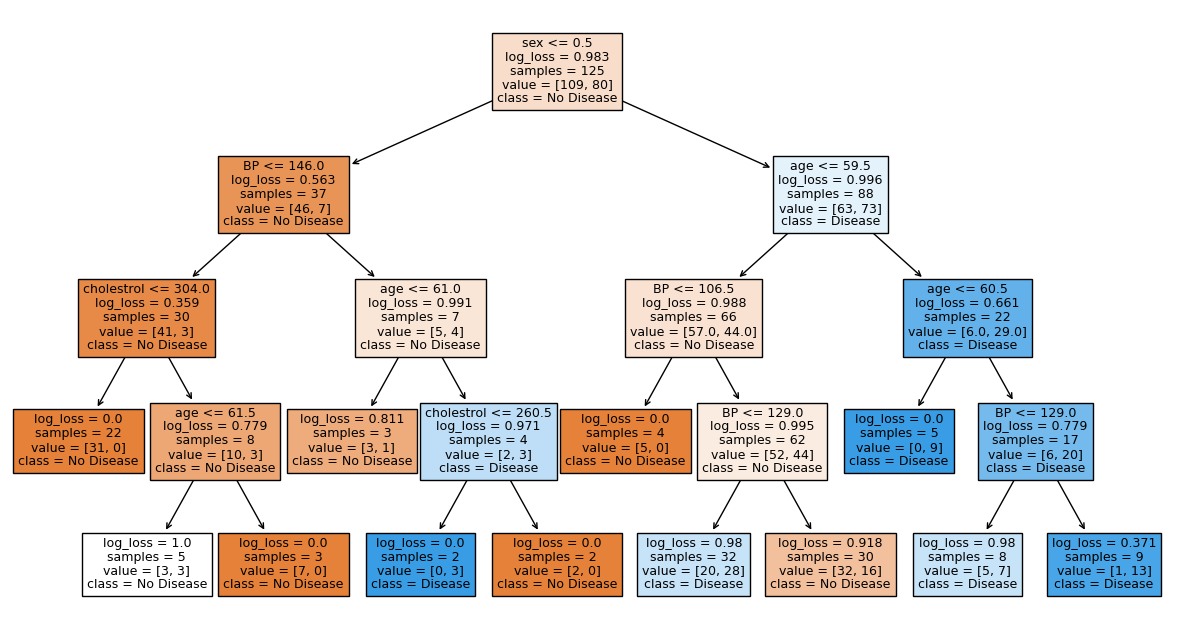

In [96]:
plt.figure(figsize=[15,8])
plot_tree(decision_tree=sample_tree, 
          feature_names=Xtrain.columns, 
          filled=True, 
          class_names=['No Disease', 'Disease'])
plt.show()

RandomForests and DTs have a train called as the __```model.feature_importances_```__. We can use it to see which features are more important in our dataset wrt our target feature.

In RF, the aggregation of feature importance happens which is far more reliable than the individual DTs.

In [104]:
# grid_search_model.feature_importance_

# will not work as we need to get the hold of best_estimator_ first.

In [114]:
# or we can do:

grid_search_model.best_estimator_.feature_importances_

array([0.36495941, 0.14882784, 0.20080292, 0.28540983])

In [116]:
# OR:
rf_best.feature_importances_

array([0.36495941, 0.14882784, 0.20080292, 0.28540983])

In [128]:
# Lets visualize it through a more interpretable and reliable view using a dataframe.

pd.DataFrame({'Varname' : Xtrain.columns,
             'Imp' : grid_search_model.best_estimator_.feature_importances_}).sort_values(by='Imp', ascending=False)

,Varname,Imp
0,age,0.364959
3,cholestrol,0.285410
2,BP,0.200803
1,sex,0.148828


-----------

# Saving the model using the joblib:

-----------

In [130]:
import joblib
from joblib import dump, load

In [132]:
dump(grid_search_model, filename='Random_forest_classifier.joblib')

['Random_forest_classifier.joblib']

-----------

--------

# RandomForest Regressor:

In [275]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [277]:
df.shape

(545, 13)

In [279]:
df.isnull().sum().any()

False

In [281]:
num_vars = df.select_dtypes(include='number').columns
num_vars

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [283]:
cat_vars = df.select_dtypes(include='object').columns
cat_vars

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [285]:
binary_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

df[binary_vars] = df[binary_vars].apply(lambda x: x.map({'yes':1, 'no':0}))

In [287]:
dummy_df = pd.get_dummies(df.furnishingstatus, dtype='int', drop_first=True)
dummy_df.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [289]:
df = pd.concat([df, dummy_df], axis=1)
df.shape

(545, 15)

In [291]:
df = df.drop('furnishingstatus', axis=1)
df.shape

(545, 14)

### Train test split:

In [294]:
y = df.pop('price')
X = df

In [296]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=42)

In [298]:
rf = RandomForestRegressor(random_state=42)

grid_space = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                'max_features' : ['sqrt', 'log2'],
                'max_depth' : [3,4,5],
                'min_samples_split' : [2,5,10,15,17,20],
                'min_samples_leaf' : [2,5,10,15,17,20]}

grid_search_model = GridSearchCV(estimator=rf, 
                                 param_grid=grid_space,
                                 scoring='neg_mean_squared_error',      # accuracy because in our case, the classes are failry balanced.
                                 cv=5, 
                                 n_jobs=-1, 
                                 return_train_score=True, 
                                 verbose=1)

In [300]:
grid_search_model.fit(Xtrain, ytrain)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 5, 10, 15, 17, 20],
                         'min_samples_split': [2, 5, 10, 15, 17, 20]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [301]:
final_dtr = grid_search_model.best_estimator_

In [302]:
ytrain_pred = final_dtr.predict(Xtrain)
ytest_pred = final_dtr.predict(Xtest)

In [303]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [304]:
print(f'Train r2 score : {round(r2_score(ytrain, ytrain_pred), 3)}')
print(f'Test r2 score : {round(r2_score(ytest, ytest_pred), 3)}')

Train r2 score : 0.73
Test r2 score : 0.587


In [305]:
print(f" The MAE for train is : {round(mean_absolute_error(ytrain, ytrain_pred), 3)}")
print(f" The MAE for test is : {round(mean_absolute_error(ytest, ytest_pred), 3)}")

 The MAE for train is : 654071.568
 The MAE for test is : 988622.17


In [306]:
print(f"The MSE for train is : {round(mean_squared_error(ytrain, ytrain_pred), 3)}")
print(f"The MSE for test is : {round(mean_squared_error(ytest, ytest_pred), 3)}")

The MSE for train is : 849094085323.539
The MSE for test is : 1779453760385.734


In [307]:
print(f"The RMSE for train is : {round(root_mean_squared_error(ytrain, ytrain_pred), 3)}")
print(f"The RMSE for test is : {round(root_mean_squared_error(ytest, ytest_pred), 3)}")

The RMSE for train is : 921463.014
The RMSE for test is : 1333961.679


In [308]:
y.describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

In [318]:
100*921463.014/y.mean()

19.33113810572259

our model is making a 19.33% of error on train set which is a significant error.

In [321]:
100*1333961.679/y.mean()

27.984842639045514

Our model is making a 27.98% of error on the test set whic is significant. We would need to tune our forest ahead.

In [324]:
# Plot the decision tree no 3 from our RandomForest to see what it looks like:
plt.figure(figsize=(200, 70))  # Adjust the size as needed
plot_tree(final_dtr.estimators_[2], 
          filled=True, 
          feature_names=Xtrain.columns,  # Make sure to use the correct feature names
          rounded=True)
plt.title('Decision Tree Regressor')
plt.show()

In [325]:
rf_best = grid_search_model.best_estimator_
rf_best.feature_importances_

array([0.32748121, 0.05662191, 0.15974955, 0.10235563, 0.02296637,
       0.0221725 , 0.03562166, 0.01141485, 0.11116863, 0.07120988,
       0.03342431, 0.01260913, 0.03320437])

In [326]:
Xtrain

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
126,7160,3,1,1,1,0,1,0,0,2,1,0,1
363,3584,2,1,1,1,0,0,1,0,0,0,1,0
370,4280,2,1,1,1,0,0,0,1,2,0,1,0
31,7000,3,1,4,1,0,0,0,1,2,0,1,0
113,9620,3,1,1,1,0,1,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,1,0,0,0,1,0,0,0,1
106,5450,4,2,1,1,0,1,0,1,0,1,1,0
270,4500,3,2,3,1,0,0,1,0,1,0,0,0
435,4040,2,1,1,1,0,0,0,0,0,0,0,1


In [327]:
pd.DataFrame({
    'Varname' : Xtrain.columns,
    'Imp' : rf_best.feature_importances_
}).sort_values(by='Imp', ascending=False)

,Varname,Imp
0,area,0.327481
2,bathrooms,0.159750
8,airconditioning,0.111169
3,stories,0.102356
9,parking,0.071210
1,bedrooms,0.056622
6,basement,0.035622
10,prefarea,0.033424
12,unfurnished,0.033204
4,mainroad,0.022966


## __Imp Note:__
### __(unknown directions of these features)__ 
 - We get to see feature importances in DTs and RFs but __we would not know the direction of these features__ weather they are positively significant or negatively significant.